# (1.) วิเคราะห์ความรู้สึกจากภาพยนตร์ IMDB (Keras datasset)

workshop นี้แสดงการใช้ NN จำแนกความรู้สึก โดยวิเคราะห์จากข้อความ/ความคิดเห็นหรือ ที่มีต่อภาพยนตร์ว่าเป็นแง่บวกหรือแง่ลบ (Sentimet analysis) สามารถนำวิธีการไปประยุกต์สร้างระบบวิเคราะห์ความรู้สึกจาก Review สินค้า, วิเคราะห์ข้อความจาก Social media หรือสร้างระบบจำแนกหมวดหมู่เอกสารได้

ข้อมูล Dataset ข้อนี้เป็นความคิดเห็นหรือ Review ที่มีต่อภาพยนตร์จาก IMDB แบ่งเป็น Train และ Test อย่างละ 25000 Sample โดย Keras ได้บรรจุ Dataset ที่ผ่านการประมวลผลเบื้องต้นมาแล้ว โดยข้อมูลจะอยู่ในรูปแบบที่เข้ารหัสแล้วเรียบร้อย ก็คือเป็นตัวเลขแทนข้อความแล้ว (Encoded)

เนื่องจากข้อมูลมีจำนวนมาก ควรใช้ GPU จากนั้นทยอยอิมพอร์ตไลบารี

In [ ]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense
from keras.datasets import imdb

## โหลดข้อมูลและตรวจสอบเบื้องต้น

โหลดข้อมูลและตรวจสอบเบื้องต้น

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()   # โหลดข้อมูล

โหลดข้อมูล จะแบ่งเป็นชุด Train และ Test ให้เรียบร้อย ลองตรวจสอบดูข้อมูล Train จะได้ข้อมูลที่อยู่ในรูปแบบ List ซ้อน List ที่ค่อนข้างยาว แต่โดยสรุปก็คือ List ย่อยเป็นข้อความ Review ที่แทนด้วยเลขรหัสแล้ว ซึ่งขณะนี้จะยังอ่านไม่ออกว่าเขียนอะไรไว้ และแต่ละ Review จะมีความยาวไม่เท่ากัน ขึ้นอยู่กับโพสต์แต่ละคน

In [ ]:
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

ตรวจดู y_train จะได้ข้อมูลที่แดงอารมณ์ความรู้สึก 1=แง่บวก(Positive) 0=แง่ลบ(Negative) เช่น Review แรก คนเขียนแสดงความเห็นแง่บวก (ดี) ส่วน Review ที่ 2, 3 คนเขียนแสดงความเห็นแง่ลบ (ไม่ดี) ฯลฯ

In [ ]:
print(y_train[:15])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0]


ตรวจสอบดูมิติข้อมูล จะพบว่าชุด Train มีจำนวน 25000 ชุด Test ก็มี 25000 (50:50)

In [ ]:
X_train.shape

(25000,)

In [ ]:
X_test.shape

(25000,)

ตรวจดู Train และ Test ว่า Label หรือ Class(y) มีอะไรบาง และมีอย่างละเท่าไหร่ จะพบว่ามี Class 0 และ 1 เท่าๆกัน คือ 12500

In [ ]:
cls, count = np.unique(y_train, return_counts=True)   # Train
print(cls)
print(count)

[0 1]
[12500 12500]


In [ ]:
cls, count = np.unique(y_test, return_counts=True)   # Test
print(cls)
print(count)

[0 1]
[12500 12500]


เนื่องจากข้อความ Review ที่เขียนไว้ เป็นเลขรหัส จะอ่านไม่ออกว่าเขียนอะไรบ้าง ดังนั้น ลองถอดรหัส (Decode) เพื่อดูว่าข้อความ Review ที่เขียนไว้ ผลจากการถอดรหัส คนแรกเขียนไว้ว่า 'this film was just ...' (ตัดมาแสดงบางส่วน) หากต้องการดู Review รายการอื่นให้เปลี่ยนเลขลำดับ index เช่น X_train[1] ฯลฯ

In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = ' '.join([reverse_index.get(i - 3, '#') for i in X_train[0]])
decoded

1641221/1641221 [==============================] - 1s 0us/step


"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [ ]:
decoded = ' '.join([reverse_index.get(i - 3, '#') for i in X_train[1]])
decoded

"# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

นำ Train กับ Test มารวมกัน เพื่อหาความยาว (จำนวนคำ) Min Max และค่าเฉลี่ย

In [ ]:
data = np.concatenate((X_train, X_test), axis=0)    # รวม
targets = np.concatenate((y_train, y_test), axis=0)

print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))   # มีคำทั้งหมดกี่คำ

sents_len = [len(i) for i in data]
print("Average Review length:", np.mean(sents_len))   # 8วามยาวเฉลี่ยของ Review (กี่คำ)
print("Standard Deviation:", round(np.std(sents_len)))   # ค่า SD
print("Min length:", np.min(sents_len))   # Reviewสั้นสุด กี่คำ
print("Max length:", np.max(sents_len))   # Reviewยาวสุด กี่คำ

Categories: [0 1]
Number of unique words: 88585
Average Review length: 234.75892
Standard Deviation: 173
Min length: 7
Max length: 2494


เพื่อให้ชัดเจนว่าการเขียนสั้น ยาว มีการกระจายอย่างไร ค่อนไปทางสั้น หรือยาว ใช้วิธีการพล็อต Histogram ดังนี้

In [ ]:
import pandas as pd

df = pd.DataFrame(sents_len, columns=['words'])
df.describe().round(2)

,words
count,50000.00
mean,234.76
std,172.91
min,7.00
25%,129.00
50%,176.00
75%,285.00
max,2494.00


array([[<Axes: title={'center': 'words'}>]], dtype=object)

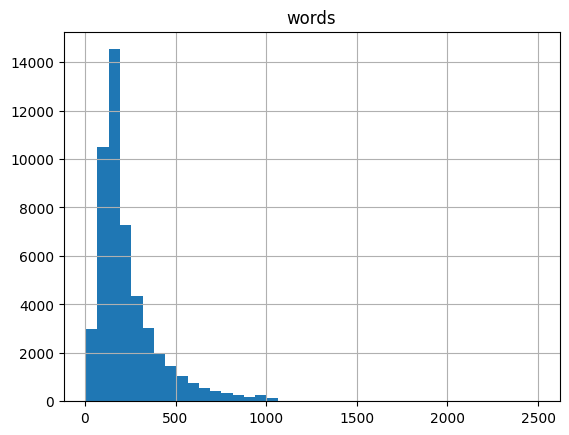

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=40)

จะเห็นว่าการเขียน Review ที่ยาวเกิน 1000 คำขึ้นไป มีน้อยมาก ส่วนใหญ่เขียน Review ความยาวประมาณ 250 คำ

## เตรียมข้อมูล

แต่ละ Review ยาวไม่เท่ากัน แสดงว่าแต่ละ Sample ที่ป้อนเข้า NN จะมีขนาดไม่เท่าเขียน แต่เนื่องจาก NN ต้องรับ input ที่มีขนาดเท่าๆกัน ดังนั้น จึงต้องทำให้ทุก Sample มีความยาวเท่ากันเสียก่อน

ดังนั้น จึงต้องเตรียมข้อมูลก่อนทำการ Train ทำให้ทุก Sample มีความยาวเท่ากันโดยการเติม 0 (เรียกว่า Padding) เพื่อให้ทุก Review มีความยาวเท่าๆกัน โดยการกำหนดความยาวหรือจำนวนคำที่ต้องการ หากใช้ค่ามาก พารามิเตอร์ของ Model ก็จะใหญ่มาก หากใช้ค่าน้อย ข้อความใน Review จะถูกตัดสั้นไป ทำให้ Model ไม่มีประสิทธิภาพ

ในข้อนี้จะเลือกใช้ความยาว 250 คำ

In [ ]:
max_len = 250   # จำนวนความยาวสูงสุด (for padding)

# ตัดคำที่ยาวเกิน 250 และเติม 0 (Padding) ด้านท้ายของ Review ที่สั้นกว่า 250 คำ
X_train = pad_sequences(X_train, truncating='post', padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, truncating='post', padding='post', maxlen=max_len)

# ถ้าต้องการลดเวลาในการ Train ให้ลด Samples ลง แต่ความแม่นยำจะน้อยลง
# num_samples = 6000
# X_train = X_train[: num_samples]
# y_train = y_train[: num_samples]
# X_test = X_test[: num_samples]
# y_test= y_test[: num_samples]

In [ ]:
X_train.shape

(25000, 250)

In [ ]:
X_train[0].shape    # ตรวจสอบมิติ ค่าเท่ากับ max_len

(250,)

## สร้าง Model

โครงสร้าง Model ประกอบด้วย 2 ส่วนหลัก คือ
- การสร้าง Feature ของข้อความ หรือที่เรียกว่า Embedding (ดูบทที่ผ่านมา) ข้อนี้ใช้ของ Keras
- ชั้น Layer ทำการจำแนก สามารถใช้ LSTM GRU หรือ CNN หรืออื่นๆ โดยในที่นี้ใช้ Biirectional GRU และ LSTM

ทำการสร้าง Model โดยจะต้องกำหนดค่าสำหรับ Layer แรก
- จำนวนคำสูงสุด vocab_len โดยทั่วไปจะตั้งให้มากกว่า Unique words อยู่ 1 (Unique words + 1) ซึ่งในขั้นตอนที่ผ่านมา เราได้ตรวจสอบแล้วว่า จำนวนคำทั้งหมดมี Number of unique words: 88585 สามารตั้งค่า 88586 ได้ ข้อนี้ใช้ค่า 90000 เพื่อให้ง่าย
- ความยาวเวกเตอร์คำ embed_size ในที่นี้กำหนดใช้ 100

**กรณีใช้ GRU**

In [ ]:
vocab_len = 90000
embed_size = 100    # ความยาวเวกเตอร์

model = Sequential()    # สร้าง Model
model.add(Embedding(vocab_len, embed_size, input_shape=(X_train.shape[1],)))
model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 100)          9000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               176640    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 9176897 (35.01 MB)
Trainable params: 9176897 (35.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Param คือ vocab * embed-size ถ้าตั้งค่าเกินไปมาก จะทำให้การ Train ช้า

ทำการ compile และ fit ในที่นี้ กำหนด 10 epochs และ batch_size 128

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 36s 162ms/step - loss: 0.5880 - accuracy: 0.6752 - val_loss: 0.4631 - val_accuracy: 0.7917
Epoch 2/10
196/196 [==============================] - 25s 126ms/step - loss: 0.2849 - accuracy: 0.8857 - val_loss: 0.3779 - val_accuracy: 0.8361
Epoch 3/10
196/196 [==============================] - 17s 89ms/step - loss: 0.1439 - accuracy: 0.9520 - val_loss: 0.4121 - val_accuracy: 0.8314
Epoch 4/10
196/196 [==============================] - 17s 87ms/step - loss: 0.0828 - accuracy: 0.9738 - val_loss: 0.5647 - val_accuracy: 0.8250
Epoch 5/10
196/196 [==============================] - 14s 71ms/step - loss: 0.0474 - accuracy: 0.9845 - val_loss: 0.6164 - val_accuracy: 0.8116
Epoch 6/10
196/196 [==============================] - 13s 65ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.7202 - val_accuracy: 0.8234
Epoch 7/10
196/196 [==============================] - 14s 74ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.9679 - val_accurac

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(accuracy))

782/782 [==============================] - 7s 9ms/step - loss: 1.1947 - accuracy: 0.8103
Test accuracy: 0.810


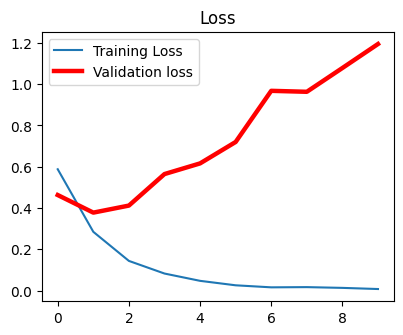

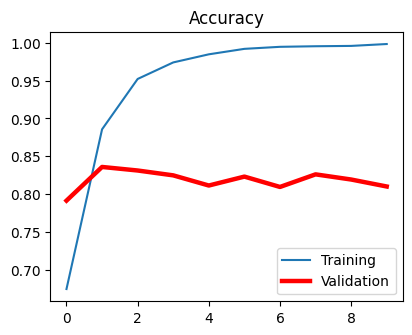

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation loss')
plt.legend()

plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

**กรณีใช้ LSTM**

In [ ]:
vocab_len = 90000
embed_size = 100    # ความยาวเวกเตอร์

model = Sequential()    # สร้าง Model
model.add(Embedding(vocab_len, embed_size, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 100)          9000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9117377 (34.78 MB)
Trainable params: 9117377 (34.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 29s 138ms/step - loss: 0.6932 - accuracy: 0.5113 - val_loss: 0.6908 - val_accuracy: 0.5309
Epoch 2/10
196/196 [==============================] - 25s 129ms/step - loss: 0.6679 - accuracy: 0.5825 - val_loss: 0.6330 - val_accuracy: 0.6331
Epoch 3/10
196/196 [==============================] - 19s 96ms/step - loss: 0.5944 - accuracy: 0.6752 - val_loss: 0.7013 - val_accuracy: 0.5171
Epoch 4/10
196/196 [==============================] - 14s 69ms/step - loss: 0.5962 - accuracy: 0.6556 - val_loss: 0.6273 - val_accuracy: 0.6605
Epoch 5/10
196/196 [==============================] - 11s 55ms/step - loss: 0.5794 - accuracy: 0.7004 - val_loss: 0.6860 - val_accuracy: 0.5361
Epoch 6/10
196/196 [==============================] - 13s 66ms/step - loss: 0.5299 - accuracy: 0.7307 - val_loss: 0.6769 - val_accuracy: 0.6544
Epoch 7/10
196/196 [==============================] - 9s 48ms/step - loss: 0.5706 - accuracy: 0.7052 - val_loss: 0.6415 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(accuracy))

782/782 [==============================] - 4s 5ms/step - loss: 0.6380 - accuracy: 0.6592
Test accuracy: 0.659


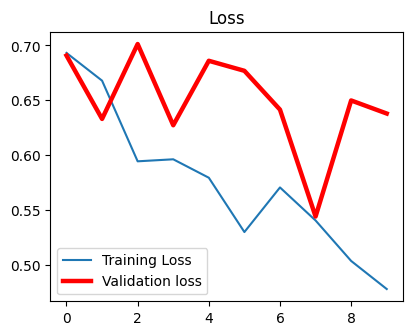

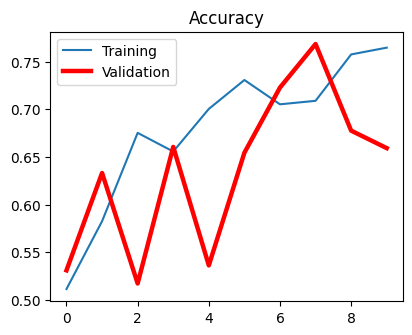

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation loss')
plt.legend()

plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

Bidirectional GRU ซึ่งมีคุณสมบัติเป็นแบบสองทิศทาง สังเกตว่าความแม่นยำ (Accuracy) จะเร็วขึ้นมาก

ส่วนของ LSTM จะเห็นว่า Accuracy ขึ้นช้ากว่า ใช้เวลา Train นานกว่า(จำนวน epochs มากกว่า) ส่วนค่าความแม่นยำเมื่อ Train ได้ที่แล้ว ถือว่าอยู่ในระดับใกล้เคียงกัน (ในทางหนังสือ)

สรุป workshop นี้ ทำการ Sentiment analysis เป็นแบบ Supervised Learning คือจะต้องมี Label/target/class บ่งบอกว่าแต่ละข้อความีคลาสอะไร สามารถประยุกต์ใช้กับข้อความหลายแหล่ง เช่น วิเคราะห์การเขียน Review ให้ความคิดเห็นเกี่ยวกับสถานที่ท่องเที่ยว ร้านอาหาร ฯลฯ ว่าเป็นแง่บวก หรือแง่ลบ

# (2.) วิเคราะห์ความรู้สึกจากภาพยนตร์ IMDB (Load csv.)

ข้อที่แล้ว นำข้อมูลที่ประมวลผลเบื้องต้น เข้ารหัสเรียบร้อยแล้วมาทำการ Train และ Test (แทนที่คำด้วยตัวเลขเรียบร้อยแล้ว) ส่วนข้อนี้เป็นการจำแนกอารมณ์ความรู้สึกจากข้อความเช่นกัน แต่จะมีรายละเอียดเพิ่มเติมดังนี้
- อ่านข้อมูล Dataset จาก CSV ซึ่งเป็นข้อความจากการโพสต์ Review ที่ประกอบด้วยข้อความ และแท็ก HTML
- ทำการประมวลผลเบื้องต้น (Preprocess) ได้แก่ ตัดแท็ก HTML ตัดอักขระพิเศษที่ไม่มีผลกับการวิเคราะห์ทิ้งไป (!@#$) และเปลี่ยนเป็นอักษรตัวเล็ก
- ใช้ Pre-train Model คำศัพท์ของ GloVe ที่มีขนาดเวกเตอร์ 100 แทนการสร้าง Embedding ด้วย Keras

เนื่องากข้อมูลมีจำนวนมาก แนะนำให้ใช้ GPU ของ Colab

In [1]:
import numpy as np
import pandas as pd
import gensim
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense

In [ ]:
gensim.__version__, np.__version__

('4.3.2', '1.23.5')

ติดตั้งไลบารี Beautifulsoup4 สำหรับตัดแท็ก HTML

In [ ]:
!pip install beautifulsoup4

## เตรียม Pre-trained model คำศัพท์

In [2]:
import gensim.downloader as api

wv = api.load('glove-wiki-gigaword-100')    # ขนาด 128 MB 400000 words
wv

[==================================================] 100.0% 128.1/128.1MB downloaded


ตรวจดูว่ามีคำศัพท์กี่คำ จะพบว่ามีคำศัพท์ (English) 4 แสนคำ

In [3]:
len(wv.index_to_key)

400000

ตรวจดูขนาดเวกเตอร์

In [4]:
wv.vector_size

100

ระบบนี้เกี่ยวกับการวิจารณ์ภาพยนตร์ อาจจะมีคำบ่นต่างๆ ซึ่งคำบ่นแต่ละคำจะมีค่าความคล้าย เช่น horrible ใกล้เคียงกับ awful terrible ...

In [5]:
wv.similar_by_word('horrible')

[('awful', 0.921971321105957),
 ('terrible', 0.919477105140686),
 ('horrendous', 0.8366580605506897),
 ('dreadful', 0.8184822797775269),
 ('horrific', 0.8176026344299316),
 ('horrifying', 0.8023055791854858),
 ('appalling', 0.7695969939231873),
 ('tragic', 0.7407631874084473),
 ('disgusting', 0.7368147373199463),
 ('ugly', 0.7360007762908936)]

In [6]:
wv.most_similar('crap', topn=8)

[('shit', 0.6642228364944458),
 ('fucking', 0.6362317800521851),
 ('whack', 0.6277898550033569),
 ('baloney', 0.5797702074050903),
 ('fuck', 0.5778754353523254),
 ('heck', 0.5700293779373169),
 ('damn', 0.5665410161018372),
 ('craziness', 0.5653018355369568)]

## โหลดข้อมูล และประมวลผลเบื้องต้น

- ดาวน์โหลดไฟล์ที่มีผู้โพสต์ Review แสดงความเห็นภาพยนตร์ โดยข้อมูลถูกรวบรวมเป็นไฟล์ CSV โหลดได้จาก https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/version/1
- อัปโหลดเข้า Colab

อ่านไฟล์เข้าสู่ Pandas และดูข้อมูลบางส่วน จะพบว่ามีคอลัมน์ review คือ ข้อความที่ผู้โพสต์แสดงความคิดเห็น ส่วน sentiment คือคลาสหรือ Label ที่บอกว่า Review นี้แง่บวก (positive) หรือแง่ลบ (negative) (Label ได้จากผู้รวบรวมข้อมูล เป็นผู้กำหนดว่าข้อความนี้ บวก หรือ ลบ)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/deep_greenbook/datasets/IMDB Dataset.csv',
                 encoding='utf-8')    # read CSV
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


สร้างคอลัมน์ label เพื่อนำไปใช้ Train และ Test โดยให้ positive=1 ส่วน negative=0

In [8]:
df['label'] = np.where(df.sentiment == 'positive', 1, 0)
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


การประมวลผลเบื้องต้นสำหรับข้อความได้แก่ เปลี่ยนเป็นอักษรเล็ก ตัดแท็ก HTML ตัดคำและอักขระที่ไม่มีผลต่อความหมายของประโยค Review เริ่มจากเปลี่ยนคำให้เป็นตัวอักษรเล็ก ดังนี้

In [9]:
df['review2'] = df.review.str.lower()

In [10]:
df.head()

,review,sentiment,label,review2
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"petter mattei's ""love in the time of money"" is..."


In [26]:
df.shape

(50000, 4)

จะได้คอลัมน์ review2 เป็นข้อความที่เปลี่ยนเป็นอักษรตัวเล็กแล้ว ตรวจดูข้อมูล Index ต่อไปนี้ จะพบว่ามีแท็ก HTML ให้ทำการตัดทิ้งด้วย BeautifulSoup

In [11]:
df.iloc[[1, 25319, 19574, 49804]]

,review,sentiment,label,review2
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. <br /><br />the...
25319,WE FAW DOWN <br /><br />Aspect ratio: 1.33:1<b...,negative,0,we faw down <br /><br />aspect ratio: 1.33:1<b...
19574,<br /><br />The play has been heavily edited a...,negative,0,<br /><br />the play has been heavily edited a...
49804,"***May Contain Spoilers*** OK, it wasn't exact...",positive,1,"***may contain spoilers*** ok, it wasn't exact..."


In [12]:
# ตัดแท็ก HTML
from bs4 import BeautifulSoup

def remove_tag(x):
  soup = BeautifulSoup(x)
  return soup.get_text()

df['review2'] = df.review2.apply(remove_tag)

<ipython-input-12-c49a0846b557>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(x)


In [13]:
df.iloc[[1, 25319, 19574, 49804]]

,review,sentiment,label,review2
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. the filming tec...
25319,WE FAW DOWN <br /><br />Aspect ratio: 1.33:1<b...,negative,0,we faw down aspect ratio: 1.33:1sound format: ...
19574,<br /><br />The play has been heavily edited a...,negative,0,the play has been heavily edited and the order...
49804,"***May Contain Spoilers*** OK, it wasn't exact...",positive,1,"***may contain spoilers*** ok, it wasn't exact..."


ตัดคำที่เป็น stopwords ด้วย Gensim แล้วเขียนทัยลงไปในคอลัมน์ review2

In [14]:
from gensim.parsing.preprocessing import remove_stopwords

df['review2'] = df.review2.apply(remove_stopwords)

ตัดแบ่งคำ (Tokenize) และกรองอักขระที่ไม่มีผล เช่น $%&()*+,-./:;<=>?@[\\]^_{|}~\t\n

In [15]:
tk = Tokenizer()
tk.fit_on_texts(df.review2)   # fit tokenizer เข้ากับเอกสาร

ตรวจสอบคำที่ตัดแล้ว

In [16]:
tk.word_index

{'movie': 1,
 'film': 2,
 'like': 3,
 "it's": 4,
 'good': 5,
 'it': 6,
 'the': 7,
 'time': 8,
 'story': 9,
 'bad': 10,
 'great': 11,
 'people': 12,
 "don't": 13,
 'way': 14,
 'movies': 15,
 'think': 16,
 'characters': 17,
 'watch': 18,
 'films': 19,
 'seen': 20,
 'character': 21,
 'plot': 22,
 'love': 23,
 'acting': 24,
 'life': 25,
 'best': 26,
 'know': 27,
 'little': 28,
 'i': 29,
 'this': 30,
 'better': 31,
 'end': 32,
 'man': 33,
 'scene': 34,
 'and': 35,
 'scenes': 36,
 'well': 37,
 'real': 38,
 "i'm": 39,
 'watching': 40,
 'thing': 41,
 "doesn't": 42,
 'actors': 43,
 'years': 44,
 'funny': 45,
 "didn't": 46,
 'old': 47,
 'work': 48,
 'actually': 49,
 '10': 50,
 'makes': 51,
 'look': 52,
 'director': 53,
 'all': 54,
 'going': 55,
 'new': 56,
 'lot': 57,
 'one': 58,
 'cast': 59,
 'things': 60,
 'want': 61,
 'pretty': 62,
 'world': 63,
 'horror': 64,
 "can't": 65,
 'young': 66,
 'got': 67,
 'thought': 68,
 'big': 69,
 'fact': 70,
 'long': 71,
 'that': 72,
 "that's": 73,
 "i've": 74,

In [17]:
tk.word_index['film']   # ต้องการดูว่า film มีค่ารหัส Index คืออะไร

2

หาว่าจำนวนคำทั้งหมดที่ไม่ซ้ำ (Unique) มีกี่คำ จะพบว่ามี 125498 คำที่ไม่ซ้ำกัน แต่ในที่นี้ +1 เพื่อนำไปกำหนดขนาด vocab_size ให้กับ Model

In [18]:
vocab_size = len(tk.word_index) + 1
vocab_size

125499

ทำการเข้ารหัสคำ (เปลี่ยนคำให้เป็นตัวเลข) จากนั้นลองดูข้อมูลที่ได้ จะเห็นว่า Review ประโยคข้อความเปลี่ยนเป็นตัวเลขแล้ว

In [19]:
sents_enc = tk.texts_to_sequences(df.review2)

In [20]:
sents_enc[1][:15]    # เอาประโยคแรก, 15 คำ

[245,
 28,
 207,
 1244,
 2870,
 17927,
 47,
 8,
 2260,
 1449,
 261,
 13243,
 26544,
 147,
 1715]

เมื่อเทียบกับข้อที่ 1 ที่ผ่านมา ข้อมูล sents_enc ณ จุดนี้ เทียบได้ับข้อมูลที่โหลดจาก imdb.load_data() นั่นเอง (imdb.load_data() คือ Dataset ที่ Keras เข้ารหัสตัวเลขเรียบร้อย)

วิเคราะห์หาความยาวเฉลี่ย Min Max โดยนับความยาวของ List แต่ละ Review จะได้ว่าความยาวของ Review ไม่เท่ากับข้อที่ 1 ทั้งนี้เพราะการประมวลผลเบื้องต้น และตัดคำมีวิธีที่แตกต่างกัน

In [21]:
sents_len = [len(i) for i in sents_enc]

print("Average Review length:", np.mean(sents_len))   # 8วามยาวเฉลี่ยของ Review (กี่คำ)
print("Standard Deviation:", round(np.std(sents_len)))   # ค่า SD
print("Min length:", np.min(sents_len))   # Reviewสั้นสุด กี่คำ
print("Max length:", np.max(sents_len))   # Reviewยาวสุด กี่คำ

Average Review length: 115.1484
Standard Deviation: 87
Min length: 3
Max length: 1362


## เตรียมข้อมูล

ขั้นตอนนี้เป็นการเตรียมข้อมูลก่อนน Train ประกอบด้วยการเติม 0 (Padding) ให้แต่ละ Review มีความยาวเท่ากัน โดยจะต้องกำหนดความยาวหรือจำนวนคำที่ต้องการ ในที่นี้ใช้ 200 คำ (ค่าเฉลี่ยที่ตรวจสอบได้ก่อนหน้านี้ มีความยาวประมาณ 115 คำ สูงสุด 1362 คำ)

In [22]:
max_len = 200   # จำนวนความยาวสูงสุด (for padding)

# ตัดคำที่ยาวเกิน 250 และเติม 0 (Padding) ด้านท้ายของ Review ที่สั้นกว่า 250 คำ
sents_pad = pad_sequences(sents_enc, truncating='post', padding='post', maxlen=max_len)

เนื่องจากข้อมูลเป็นเลขรหัส อ่านไม่ออกว่าเขียนอะไรบ้าง ดังนั้น ลองถอดรหัส (Decode) ดูข้อความ Review ของ 2 คนแรก เขียนว่าอย่างไร

In [23]:
check_reviews = sents_pad[:2]
tk.sequences_to_texts(check_reviews)

["reviewers mentioned watching 1 oz episode you'll hooked right exactly happened me the thing struck oz brutality unflinching scenes violence set right word go trust me faint hearted timid pulls punches regards drugs sex violence hardcore classic use word it called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish more so scuffles death stares dodgy dealings shady agreements far away i main appeal fact goes shows wouldn't dare forget pretty pictures painted mainstream audiences forget charm forget romance oz doesn't mess around episode saw struck nasty surreal couldn't ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards who'll sold nickel inmates who'll kill order away it mannered middle class inmates turned prison bitches lack s

## การใช้ Tokenizer

ในการตัดคำและการเข้ารหัสจะได้อ็อปเจกต์ tk (Tokenizer) เก็บค่าสำคัญต่างๆเอาไว้ ซึ่งเวลานำ Model ไปใช้ Predict ก็ต้องใช้อ็อเจกต์นี้เป็นตัวเข้ารหัสด้วย ข้อความ Review ที่นำมา Predict จึงจะมีรหัสที่ตรงกับที่ใช้ใน Model สรุปง่ายๆว่านอกจากนำ Model ไปใช้แล้ว จะต้องนำ tk นี้ไปด้วย ดังนั้น ให้ทำการบันทึกเก็บไว้

In [24]:
# Save เก็บ Tokenizer object
import pickle

with open('IMDB_tokenizer.pickle', 'wb') as handle:
  pickle.dump(tk, handle, protocol=pickle.HIGHEST_PROTOCOL)

ถ้าปิด notebook ไปแล้ว tk เดิมจะยังไม่มีค่าอะไร ต้องโหลด tk เข้ามา

In [3]:
# Load Tokenizer object
# import pickle

# with open('/content/drive/MyDrive/deep_greenbook/savemodel/IMDB_tokenizer.pickle', 'rb') as handle:
#   tk = pickle.load(handle)

เอาจริงๆ มัน run ไม่ได้เฉยเลย 5555

## เตรียมข้อมูล Train และ test

ข้อมูล X ที่นำไปไปใช้คือ sents_pad ที่ผ่านการ Padding แล้ว ซึ่งมีความยาวเท่ากันหมด (200 คำ) ส่วนค่า y คือ df.label ซึ่งก็คือ [0 1 0 0 1 ...] ให้นำข้อมูลดังกล่าวแบ่งเป็น Train และ Test ใช้สัดส่วน 50% เมื่อตรวจสอบมิติ จะได้ว่า Train และ Test มีขนาด (2500, 200) เท่ากัน

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sents_pad,
                                                    df.label, test_size=.5, random_state=1)
X_train.shape, X_test.shape

((25000, 200), (25000, 200))

ถ้าดูจาก workshop 1 จะเห็นว่าเมื่อแบ่ง train, test เสร็จ สามารถไปขั้นตอนสร้าง model ได้เลย เพราะใช้ Word Embedding ของ Keras แต่ workshop นี้ใช้ Pre-trained model ของ GloVe จึงต้องทำการสร้างเมทริกซ์ก่อน (แทนการทำ Embedding ด้วย Keras)

## สร้างเมทริกซ์ (Embedding Matrix)

เนื่องจากข้อนี้ใช้ Pre-trained model ของ GloVe จึงต้องสร้างเมทริกซ์ของแต่ละคำขึ้นมาก่อน หลักการคือสร้างเมทริกซ์ขนาด vocab_size x embed_size (125495 x 100 โดย 125495 คือ Unique หรือคำที่ไม่ซ้ำกันใน dataset ที่ตรวจสอบก่อนหน้านี้ ส่วน 100 คือ ความยาวเวกเตอร์ของ GloVe-..-100) ลักษณะเหมือนกับสร้างเมทริกซ์ ค่าเวกเตอร์ของคำตามลำดับ เช่น
```
[ [0 0 0 0 ... ],   เวกตอร์ค่าแรกเป็นศูนย์หมด (ไม่ใช่แต่ต้องสร้างไว้)
  [0.12 0.04 0.21 0.61 ... ],  เวกเตอร์ค่าลำดับที่สอง คือ คำแรก (Index=1) คือคำว่า this
  [0.25 0.14 0.32 0.17 ... ],  เวกเตอร์ค่าลำดับที่สาม คือ คำแรก (Index=2) คือคำว่า film
  [...],   ไปจนถึงคำสุดท้าย คือคำว่า zoo
]
```
ขนาดเวกเตอร์ในที่นี้ คือค่าขนาดเวกเตอร์ของ Pre-trained Model ที่ใช้ (ซึ่งก็คือ GloVe มีค่าเท่ากับ 100) โค้ดที่สร้างเมทริกซ์มีดังนี้


In [28]:
embed_size = wv.vector_size   # ขนาดเวกเตอร์ คือ 100

embedding_matrix = np.zeros((vocab_size, embed_size))   # Embedding Matrix
for word, i in tk.word_index.items():
  if i >= vocab_size:   # NUM_WORDS
    continue
  try:
    embedding_vector = wv[word]
    embedding_matrix[i] = embedding_vector[:embed_size]
  except KeyError:
    embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), embed_size)

embedding_matrix.shape

(125499, 100)

ดูข้อมูลบางส่วนของเมทริกซ์

In [29]:
embedding_matrix[1][:25]    # ประโยคแรก 25เวกเตอร์แรก

array([ 0.38251001,  0.14821   ,  0.60601002, -0.51533002,  0.43992001,
        0.061053  , -0.62716001, -0.025385  ,  0.16429999, -0.22101   ,
        0.14422999, -0.37213001, -0.21683   , -0.08895   ,  0.097904  ,
        0.65609998,  0.64455003,  0.47698   ,  0.83849001,  1.64859998,
        0.88922   , -0.1181    , -0.012465  , -0.52082002,  0.77854002])

## สร้าง Model

### GRU
สร้าง Model โดยกำหนดค่า vocab_size, embed_size คล้ายกับ Workshop ที่ผ่านมา แต่กรณีนี้ต้องกำหนดค่า weight โดยใช้เมทริกซ์ที่เตรียมก่อนหน้านี้

- ให้ Train ในชั้น Embedding

In [40]:
from keras.layers import GRU, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, embed_size,
                    weights=[embedding_matrix],     # Weight ใช้ Embedding Matrix
                    trainable=True,   # กำหนดให้เป็น Train Layer
                    input_shape=(X_train.shape[1],)
                    ))
model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          12549900  
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               176640    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 12726797 (48.55 MB)
Trainable params: 12726797 (48.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 35s 159ms/step - loss: 0.4923 - accuracy: 0.7556 - val_loss: 0.4054 - val_accuracy: 0.8253
Epoch 2/5
196/196 [==============================] - 21s 106ms/step - loss: 0.2716 - accuracy: 0.8926 - val_loss: 0.3022 - val_accuracy: 0.8742
Epoch 3/5
196/196 [==============================] - 19s 99ms/step - loss: 0.1617 - accuracy: 0.9429 - val_loss: 0.3121 - val_accuracy: 0.8816
Epoch 4/5
196/196 [==============================] - 16s 83ms/step - loss: 0.0802 - accuracy: 0.9750 - val_loss: 0.3850 - val_accuracy: 0.8768
Epoch 5/5
196/196 [==============================] - 17s 85ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.4633 - val_accuracy: 0.8706


In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(accuracy))

782/782 [==============================] - 6s 7ms/step - loss: 0.4633 - accuracy: 0.8706
Test accuracy: 0.871


- **ไม่** Train ในชั้น Embedding

ให้กำหนด trainable=False ค่าพารามิเตอร์จะลดลง เช่น จาก 12 ล้านเศษ เหลือ Trainable params เพียง 176897

In [30]:
from keras.layers import GRU, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, embed_size,
                    weights=[embedding_matrix],
                    trainable=False,   # ไม่ให้เป็น Train Layer
                    input_shape=(X_train.shape[1],)
                    ))
model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          12549900  
                                                                 
 bidirectional (Bidirection  (None, 256)               176640    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 12726797 (48.55 MB)
Trainable params: 176897 (691.00 KB)
Non-trainable params: 12549900 (47.87 MB)
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 13s 39ms/step - loss: 0.5247 - accuracy: 0.7346 - val_loss: 0.4242 - val_accuracy: 0.8118
Epoch 2/5
196/196 [==============================] - 6s 29ms/step - loss: 0.3961 - accuracy: 0.8288 - val_loss: 0.3582 - val_accuracy: 0.8461
Epoch 3/5
196/196 [==============================] - 7s 34ms/step - loss: 0.3452 - accuracy: 0.8528 - val_loss: 0.3472 - val_accuracy: 0.8526
Epoch 4/5
196/196 [==============================] - 7s 34ms/step - loss: 0.3225 - accuracy: 0.8628 - val_loss: 0.3374 - val_accuracy: 0.8585
Epoch 5/5
196/196 [==============================] - 6s 29ms/step - loss: 0.2924 - accuracy: 0.8772 - val_loss: 0.3176 - val_accuracy: 0.8638


In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(accuracy))

782/782 [==============================] - 8s 10ms/step - loss: 0.3176 - accuracy: 0.8638
Test accuracy: 0.864


จากการทดลองพบว่า การใช้ Pre-trained model และการกำหนดค่า Trainable=True จะทำให้ Accuracy วิ่งขึ้นเร็วมาก เท่ากับว่าใช้จำนวน Epoch ในการ Train น้อยกว่า Trainable=False

### LSTM

ลองใช้ LSTM เปรียบเทียบดู

In [34]:
# LSTM ไม่ใช้ Pre-trained model

model = Sequential()
model.add(Embedding(vocab_size, embed_size,
                    input_shape=(X_train.shape[1],)
                    ))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          12549900  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12667277 (48.32 MB)
Trainable params: 12667277 (48.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 37s 176ms/step - loss: 0.6929 - accuracy: 0.5081 - val_loss: 0.6843 - val_accuracy: 0.5512
Epoch 2/5
196/196 [==============================] - 30s 152ms/step - loss: 0.6378 - accuracy: 0.6614 - val_loss: 0.6465 - val_accuracy: 0.6619
Epoch 3/5
196/196 [==============================] - 26s 132ms/step - loss: 0.6480 - accuracy: 0.6156 - val_loss: 0.6878 - val_accuracy: 0.5258
Epoch 4/5
196/196 [==============================] - 21s 107ms/step - loss: 0.5996 - accuracy: 0.6698 - val_loss: 0.6221 - val_accuracy: 0.6445
Epoch 5/5
196/196 [==============================] - 17s 85ms/step - loss: 0.5431 - accuracy: 0.7322 - val_loss: 0.7277 - val_accuracy: 0.5090


In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(accuracy))

782/782 [==============================] - 4s 5ms/step - loss: 0.7277 - accuracy: 0.5090
Test accuracy: 0.509


### CNN

ลองใช้ CNN เปรียบเทียบดู

In [37]:
# CNN ไม่ใช้ Pre-trained model
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

model = Sequential()
model.add(Embedding(vocab_size, embed_size))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         12549900  
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 128)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)        

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 31s 136ms/step - loss: 0.5445 - accuracy: 0.6734 - val_loss: 0.2918 - val_accuracy: 0.8785
Epoch 2/5
196/196 [==============================] - 22s 111ms/step - loss: 0.1985 - accuracy: 0.9264 - val_loss: 0.2946 - val_accuracy: 0.8747
Epoch 3/5
196/196 [==============================] - 21s 108ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.4077 - val_accuracy: 0.8743
Epoch 4/5
196/196 [==============================] - 14s 74ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.6679 - val_accuracy: 0.8698
Epoch 5/5
196/196 [==============================] - 15s 74ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.7731 - val_accuracy: 0.8685


In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(accuracy))

782/782 [==============================] - 2s 3ms/step - loss: 0.7731 - accuracy: 0.8685
Test accuracy: 0.869


## Predict ใช้งาน

การใช้งาน คือการอินพุตข้อความ Review เข้าสู่ Model ให้ Predict บอกว่า Review มีอารมณ์ความรู้สึกในแง่บวกหรือลบ ข้อสำคัญคือ จะต้องเข้ารหัสด้วย Tokenizer ตัวเดียวกับที่ใช้ Train model

ตัวอย่างประโยคหรือ Review ที่จะ Predict มีดังนี้

In [43]:
from keras.preprocessing.text import text_to_word_sequence

comment1 = 'this film was about politics. i do not like it. It sucks. Can i get money back.'
words_tk = text_to_word_sequence(comment1)  # ตัดคำ
words_tk

['this',
 'film',
 'was',
 'about',
 'politics',
 'i',
 'do',
 'not',
 'like',
 'it',
 'it',
 'sucks',
 'can',
 'i',
 'get',
 'money',
 'back']

ทำการเข้ารหัส (ใช้ tk ตัวเดียวกับที่เตรียมข้อมูลสำหรับการ Train) จะได้ค่าเลขแทนคำ

In [44]:
new_words_enc = tk.texts_to_sequences([comment1])
new_words_enc

[[30,
  2,
  390,
  550,
  2421,
  29,
  370,
  188,
  3,
  6,
  6,
  1561,
  1549,
  29,
  1540,
  155,
  548]]

ใส่ Padding ให้ความยาวเท่ากับที่ใช้ตอน Train Model

In [45]:
X_new = pad_sequences(new_words_enc, truncating='post',
                      padding='post', maxlen=max_len)
X_new

array([[  30,    2,  390,  550, 2421,   29,  370,  188,    3,    6,    6,
        1561, 1549,   29, 1540,  155,  548,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

ลองถอดรหัสคำ จะต้องกลับมาเหมือนประโยคต้นฉบับ แสดงว่าการทำงานถูกต้อง

In [46]:
tk.sequences_to_texts(X_new)    # decode

['this film was about politics i do not like it it sucks can i get money back']

ทำการ Predict ถ้าได้ค่า Score 0.5 ขึ้นไป ความรู้สึกเป็น Positive หมายถึงอารมณ์ความรู้สึกกเป็นบวก แต่ถ้าค่าน้อยกว่า แสดงว่าเป็นลบ ตัวอย่างนี้เป็นแง่ลบ

In [47]:
result = model.predict(X_new)
print(np.squeeze(result).round(3))
print('Positive' if result[0] > 0.5 else 'Negative')

1/1 [==============================] - 1s 823ms/step
0.321
Negative


ลอง Predict หลาย Preview โดยเพิ่มข้อความ Review แล้วรวมให้เป็น 1 List

In [48]:
comment2 = 'this film was about politics. people talk about it. the film was good. i recommend.'
reviews_new = [comment1, comment2]
for i in reviews_new:
  print(i)

this film was about politics. i do not like it. It sucks. Can i get money back.
this film was about politics. people talk about it. the film was good. i recommend.


ทำการ Padding แล้วส่งเข้า Model เพื่อ Predict จะได้ค่า Score ผลลัพธ์คือ Review คนแรก ความรู้สึกเชิงลบ ส่วน Review คนที่ 2 ความรู้สึกเชิงบวก

In [52]:
new_words_enc =tk.texts_to_sequences(reviews_new)
X_new = pad_sequences(new_words_enc, truncating='post',
                      padding='post', maxlen=max_len)
result = model.predict(X_new)
print(result.round(3))
print('Positive' if result[0] > 0.5 else 'Negative')
print('Positive' if result[1] > 0.5 else 'Negative')

1/1 [==============================] - 0s 23ms/step
[[0.321]
 [0.915]]
Negative
Positive


ลองทำนาย X_test 15 ตัวแรก

In [50]:
result = model.predict(X_test[:15])
print(np.squeeze(result).round(2))

1/1 [==============================] - 0s 21ms/step
[0.01 0.   0.01 0.   0.96 0.01 0.84 0.   0.   0.01 0.71 0.   1.   1.
 0.  ]


เปรียบเทียบกับค่าจริง (y true) พบว่าส่วนใหญ่ Predict ถูกต้อง

In [51]:
y_test[:15].tolist()

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]

# (3.) ใช้งาน Transformer Pre-trained Model

Workshop นี้แสดงการใช้ Pre-trained Model แบบ Transformer จาก Hugging Face Transformers Library ในลักษณะต่างๆ เช่น การวิเคราะห์จำแนกอารมณ์ความรู้สึก (Sentiment analysis) การจัดกลุ่ม การให้คะแนน (Rating) 1-5 ดาว

เนื่องจาก Pre-trained Model มีขนาดค่อนข้างใหญ่ บางตัวมีขนาดถึง 1.5 GB แนะนำให้ใช้ Colab ถ้าต้องการประหยัดพื้นที่

In [1]:
!pip install transformers -q

## Pipeline API

ใน transformer มี Pipeline API ซึ่งเป็น high-level API ทำหน้าที่หลายขั้นตอนในกระบวนการ ได้แก่ Preprocessing ส่วนอินพุต, ส่งข้อมูลเข้า Model และ Post-processing จนได้ Output ออกมา เท่ากับว่า เรียกใช้งาน Pipeline API เลือก Pre-trained Model แล้วส่งข้อมูล Text หรือข้อความอินพุตเข้าไปเท่านั้น (ไม่ต้องทำ Preprocess ไม่ต้องสร้าง Model)

## Sentiment analysis

การใช้งานวิเคราะห์อารมณ์ความรู้สึก ให้เรียกใช้งาน Pipeline

In [3]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')  # เรียกใช้งาน Pipeline Sentiment analysis

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

ทดลองอินพุตข้อความเพื่อจำแนก Sentiment analysis จากประโยคตัวอย่าง จะได้ผลการวิเคราะห์ ความรู้สึกเป็นแง่ลบ

In [4]:
result = classifier('this film was about politics. sucks')[0]
result

{'label': 'NEGATIVE', 'score': 0.8648406863212585}

In [7]:
print(f"label: {result['label']} score: {round(result['score'], 3)}")

label: NEGATIVE score: 0.865


ปัจจุบันมี Pre-train จำนวนมากให้ใช้งาน (ดูที่ huggingface.co/models) ทดลอง Pre-trained ตัวอื่น อาจได้ค่าที่แตกต่างกัน เช่น ตัวอย่างต่อไปนี้ใช้ Pre-trained imdb กลุ่มคำวิจารณ์ภาพยนตร์ที่ใช้ Train อาจแตกต่างกับคำทั่วไปใน Pre-trained ตัวแรก ได้ผลเชิงลบเหมือนกัน แต่คำ Score ที่ได้ 0.98

In [8]:
classifier = pipeline('sentiment-analysis',
                      model="textattack/bert-base-uncased-imdb")  # ขนาด 600 MB

result = classifier('this film was about politics. sucks')[0]
result

config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

{'label': 'LABEL_0', 'score': 0.9857709407806396}

Pre-trained แต่ละตัวจะมีคลาสผลลัพธ์ที่แตกต่างกัน เช่น ตัวอย่างแรก คลาส Positive/Negative ตัวอย่างที่สอง ให้คลาสเป็น Label_xx ฯลฯ

## Rating ให้ดาว

ใช้งาน Pre-trained ที่ Rate ให้ดาว (อยู่ในกลุ่ม sentiment-analysis เหมือนกันแต่ให้วิเคราะห์แล้วให้ผลลัพธ์เป็น 1-5 ดาว)

In [9]:
# 1-5 stars 650 MB
classifier = pipeline('sentiment-analysis',
                      model="nlptown/bert-base-multilingual-uncased-sentiment")
comment1 = "This film was about politics. you may fall asleep."
comment2 = "This film was about politics. people like it. but i give 1 star"
comment3 = "This film was about politics. you should watch it."

reviews = [comment1, comment2, comment3]
classifier(reviews)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': '5 stars', 'score': 0.2961665093898773},
 {'label': '1 star', 'score': 0.9431842565536499},
 {'label': '5 stars', 'score': 0.4136579632759094}]

## การจัดกลุ่ม

สำหรับการจัดกลุ่มข้อความว่าอยู่ในกลุ่มใด โดยจะต้องระบุหมวดหมู่ขอบข่ายตัวเลือก (Candidate) เช่น

In [10]:
zshot_classifier = pipeline("zero-shot-classification")   # ขนาด Pre-trained 1.55 GB

# ประโยคข้อความ (พิมพ์ติดกันเป็นบรรทัดเดียว)
content = "With the support of a structured diabetes program, as recommended by international diabetes guidelines, the cost and health impact of condition ..."

# หมวดหมู่ที่เป็นตัวเลือกหรือ Candidate (จัดเข้าอยู่หมวดใด เหมาะสมที่สุด)
candidate_labels = ['business', 'politics', 'technology', 'entertainment', 'medicine']

results = zshot_classifier(content, candidate_labels)
results

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'With the support of a structured diabetes program, as recommended by international diabetes guidelines, the cost and health impact of condition ...',
 'labels': ['medicine', 'technology', 'business', 'politics', 'entertainment'],
 'scores': [0.8690782785415649,
  0.048088788986206055,
  0.03921341523528099,
  0.024930091574788094,
  0.018689481541514397]}

จะได้ค่าสูงสุดของหมวดหมู่ เช่น จากตัวอย่าง ประโยคจัดอยู่ในหมวดหมู่ medicine หากต้องการให้จัดเรียงเพื่อดูง่ายขึ้น ให้ใช้ for ดังนี้

In [12]:
for i, val in enumerate(results['labels']):
  print(f"{val:>14} = {round(results['scores'][i], 3)}")

      medicine = 0.869
    technology = 0.048
      business = 0.039
      politics = 0.025
 entertainment = 0.019


จะเห็นว่า Pre-trained และไลบารีสำเร็จช่วยให้การใช้งานง่ายขึ้นไม่ต้องสร้างหรือ Train Model ขึ้นเอง แต่อย่างไรก็ตาม ประสิทธิภาพที่ได้ อาจยังไม่ดีที่สุด

# (4.) Transformer และ BERT

Workshop นี้แสดงการสร้าง Model จำแนกความรู้สึก Sentiment Analysis เช่นกัน แต่ใช้เทคนิคใหม่ BERT ซึ่งได้ Model ความแม่นยำสูงถึง 92.5% (ข้อมูล IMDB CSV เดียวกัน)

การใช้ BERT สร้าง Model มี 2 ขั้นตอนคือ

1. Pretraining หรือสร้าง Pre-trained
2. Finetuning คือการ Train ด้วยข้อมูลเฉพาะงาน ซึ่ง workshop นี้ จะทำขั้นตอนนี้เท่านั้น ส่วนขั้นตอนที่ 1 ไม่ต้องทำ (ใช้ Pre-trained Model)

ปกติแล้ว การ Implement Text Classification โดยใช้ BERT จะมีหลายขั้นตอน แต่เพื่อให้ง่าย ในที่นี้จะใช้ไลบารีตัวช่วยที่ชื่อ ktrain ซึ่งไลบารีทำหน้าที่รวบหลายๆ Step ให้เพียงไม่กี่ Step (แนะนำให้ใช้ GPU ของ Colab)

## Load file & library

ทำการติดตั้ง ktrain ก่อนอิมพอร์ตไลบารีต่างๆ

In [2]:
!pip install ktrain -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [3]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

ไฟล์ข้อมูลที่ใช้ IMDB CSV ก่อนหน้านี้ หากดาวน์โหลดมาแล้ว ก็ส่งขึ้น Colab จากนั้้นอ่านข้อมูล เข้าสู่ Pandas แล้วลองตรวจดูข้อมูลบางส่วน คอลัมน์ Review คือ ข้อความที่โพสต์แสดงความคิดเห็น ส่วน sentiment คือคลาสหรือ Label ที่บอกว่า Review นี้แง่บวก(Positive) หรือลบ(Negative)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/deep_greenbook/datasets/IMDB Dataset.csv',
                 encoding='utf-8') # Dataset IMDB ตัวเดิม
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


อ่านชื่อ label/target จากคอลัมน์ sentiment เพื่อนำไปใช้คลาส

In [5]:
_, class_names = pd.factorize(df.sentiment)
class_names.to_list()

['positive', 'negative']

class_names เอาไปใช้ได้เลย ไม่ต้องทำให้เป็นเลข

## เตรียมข้อมูล Train และ Test

เตรียมข้อมูล Train และ Test โดย X แบ่งจากคอลัมน์ review (df.review) ส่วน y คือ คอลัมน์ sentiment (df.sentiment) การแบ่งใช้สัดส่วน 50% เมื่อตรวจสอบมิติ จะได้ว่า Train และ Test มีขนาด 25000 Sample เท่ากัน (เหมือน Workshop 2)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment,
                                                    test_size=.5, random_state=1)
X_train.shape, X_test.shape

((25000,), (25000,))

โหลด Pre-trained model BERT ในที่นี้ใช้ตัว distilbert-base-uncased โดยตระกูล distil-bert... จะมีขนาดเล็กกว่าตระกูล bert-... ซึ่งการประมวลผลใช้เวลาน้อยกว่า แต่ความแม่นยำอาจจะน้อยกว่า  (ดูรายชื่อได้ที่ huggingface.co/models) จะใช้เวลาโหลดนานสักครู่

In [7]:
pretrain_model = 'distilbert-base-uncased'
transformer = text.Transformer(pretrain_model, maxlen=400,  # ความยาวข้อความสูงสุด
                               classes=class_names.to_list())

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

ปกติแล้ว การทำ Preprocessing ของ BERT ส่วนของ Train และ Test จะไม่เหมือนกัน ต้องแยกกันทำ ดังนี้

In [8]:
train = transformer.preprocess_train(X_train.to_list(), y_train.to_list())
test = transformer.preprocess_test(X_test.to_list(), y_test.to_list())

preprocessing train...
language: en
train sequence lengths:
	mean : 232
	95percentile : 593
	99percentile : 904


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 230
	95percentile : 586
	99percentile : 908


ตรวจสอบมิติ x และ y หลังจากผ่าน Preprocessing แล้ว

In [20]:
train.x.shape     # มิติ X สำหรับ Train ที่ผ่าน preprocessing แล้ว (25000, 3, 400)

(25000, 3, 400)

In [21]:
train.y.shape     # มิติ y (25000, 2)

(25000, 2)

ลองดูข้อมูลบางส่วนใน Train (คำถูกแทนที่ด้วยตัวเลข)

In [22]:
train.x   # 101 คือรหัสเริ่มต้น ค่าอื่นๆ คือรหัสคำ

array([[[  101,  1045,  2572, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[  101,  2023,  3185, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[  101, 16215,  2890, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       ...,

       [[  101,  2019,  5976, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[  101,  3937,  3252, ...,  3246,  2035,   102],
        [    1,     1,     1, ...,     1,     1,     1],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[  101,  2275,  1999, ...,     0,     0,     0],
        [    1,     1,     1, ...,     0,     0,     0],
        

## สร้าง Model

การสร้าง Model เริ่มจากโหลดโครงสร้างมาจาก Pre-trained

In [9]:
model = transformer.get_classifier()    # โหลด Model

In [10]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train

การ Train จะแตกต่างกับ Keras อยู่บ้าง โดยเริ่มต้น กำหนดข้อมูลการ Train X, y, ชุด Validation และขนาด Batch size (ถ้าเป็น Keras จะกำหนดตอนสั่ง fit)

In [11]:
learner =ktrain.get_learner(model,
                            train_data=train,   # ข้อมูล Train X, Y
                            val_data=test,      # Validation
                            batch_size=16)

ขั้นตอนต่อจากนี้เป็น Option ไม่ทำก็ได้ เป็นการหาค่า Learning Rate (LR) ที่เหมาะสม ซึ่งอาจจะใช้เวลานานมาก(หลายชั่วโมง) สามารถข้ามไป fit... ได้เลย

In [12]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
 194/1562 [==>...........................] - ETA: 15:04 - loss: 0.6927 - accuracy: 0.5097

Accuracy ที่ได้ไม่สูงมากนัก แต่ก็ไม่เป็นไร

In [ ]:
learner.lr_plot()   # พล๊อตกราฟ Lerning Rate (LR)

ถ้ารันจนเสร็จแล้ว จะสามารถพล็อตกราฟได้ และจะได้ค่าที่น้อยที่สุดในช่วงประมาณ 1e4 ถึง 1e-5

นำค่าดังกล่าวไปกำหนดเ็น LR ในการ Train (epochs = 1 พอ) หากไม่ได้รัน .lr_find() ให้กำหนดค่า LR อยู่ในช่วงประมาณ 2e-5 ถึง 5e-5

ใช้เวลาในการรันประมาณ 33 นาทีบน Colab GPU

In [14]:
learner.fit_onecycle(2e-4, 1)     # Train ด้วย LR=2e-4 (2 x (1 ^ -4)), epochs=1



begin training using onecycle policy with max lr of 0.0002...
1563/1563 [==============================] - 1512s 955ms/step - loss: 0.3267 - accuracy: 0.8642 - val_loss: 0.2484 - val_accuracy: 0.8984


ผลประเมิน accuracy ได้ ...% โดยประเมินด้วย Validate จะได้ตาราง Confusion Matrix ดังนี้ (รันประมาณ 10 นาที)

In [15]:
learner.validate(class_names=transformer.get_classes())

782/782 [==============================] - 389s 495ms/step
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90     12592
    positive       0.89      0.91      0.90     12408

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



array([[11192,  1400],
       [ 1141, 11267]])

ตรวจดูว่า Review ที่ Predict ผิด และค่า Loss สูงสุด คือข้อความ Review อะไรบ้าง (n คือ จำนวนที่ต้องการลิส)

In [17]:
learner.view_top_losses(n=3, preproc=transformer)    # ใช้เวลาประมาณ 10 okmu

782/782 [==============================] - 386s 494ms/step
----------
id:216 | loss:4.85 | true:positive | pred:negative)

----------
id:9948 | loss:4.84 | true:positive | pred:negative)

----------
id:15282 | loss:4.83 | true:positive | pred:negative)



จะได้ id ของ Review ที่ผิด เช่น รายการแรก Loss=5.24 ของจริง (true:positive) คือ ความรูสึกเชิงบวก แต่ Model predict ว่าเป็นเชิงลบ (pred:negative)

ตรวจดูข้อความ Review เขียนไว้ยังไง

In [23]:
X_test[9948]

'Earnest effort which achieves some success to adapt the classic Odyssey story to a \'30\'s nostalgia period piece. The adventurers this time are escaped convicts, wandering about the Depression afflicted South bungling their way into trouble.<br /><br />The greatest strength of the film is the wonderful music soundtrack, effectively evoking not only the era that this is set in, but the spiritual references that run rampant in the film. Besides its value to the tone of the movie, the music is just plain fun to listen to.<br /><br />What cripples the film is that the characters really aren\'t that likable. In a comedy, you need that element in order to have fun along with them in their misadventures. Instead, we have a bunch of selfish, arrogant, soulless, mean spirited nobodies who really have no positive points at all. They\'re not imposing enough to make you hate them either, so it\'s hard to relate to them at all. They\'re offered up as clowns, but like people who put clown makeup o

In [25]:
test.x[9948]    # ดู token ที่เข้ารหัสแล้ว เป็นค่าตัวเลข

array([[  101,  2023, 17312, ...,     0,     0,     0],
       [    1,     1,     1, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

## ใช้งาน Predict

การใช้งาน Predict จะต้องอ่านค่าตัวทำนาย (ตัว Model) มาจาก get_predictor

In [26]:
predictor = ktrain.get_predictor(learner.model, transformer)  # ตัวทำนาย

อินพุตประโยคเข้าไป Predict จะได้ Predict Sentiment ตามลำดับ

In [28]:
comment1 = 'this film was about politics. waste my time and money.'
comment2 = 'this film was about politics. It sucks, horrible. Can i get money back'
comment3 = 'this film was about politics. i give 5 stars.'
comment4 = 'this film was about politics. you should watch it.'

new_reviews = [comment1, comment2, comment3, comment4]
predictor.predict(new_reviews)

['negative', 'negative', 'positive', 'positive']

ผลลัพธ์คือ 2 Review แรกเป็น Negative ที่เหลือเป็น Positive ซึ่งถูกต้อง

หากต้องนำค่าความน่าจะเป็นในการ Predict ให้ระบุพารามิเตอร์ return_proba=True จะได้ฝั่งซ้ายและฝั่งขวา เป็นค่าความเชื่อมั่นของ Negative และ Positive

In [29]:
preds = predictor.predict(new_reviews, return_proba=True)
print(preds)

[[0.97923034 0.02076969]
 [0.9872039  0.0127961 ]
 [0.49390966 0.5060904 ]
 [0.19620349 0.8037965 ]]


จากผลลัพธ์ที่มีค่าความน่าจะเป็นดังกล่าว หากต้องการหาว่าอยู่ในคลาสไหน ให้ใช้ Numpy Argmax หาตำแหน่งของค่าสูงสุด

In [30]:
results = [np.argmax(p) for p in preds]
results

[0, 0, 1, 1]

ต้องการนำข้อมูล Review ตัว Test มาทดสอบโดยตรง

In [31]:
predictor.predict(X_test[9948])

'negative'

## บันทึก & โหลด Model มาใช้งาน

- Save

In [32]:
predictor.save('myPredictor_17')

- Load

In [33]:
reload_predictor = ktrain.load_predictor('myPredictor_17')

- copy to ggDrive

In [34]:
!cp -r 'myPredictor_17' '/content/drive/MyDrive/deep_greenbook/savemodel'

# (5.) การใช้ Transformer ภาษาไทย

workshop นี้แสดงการวิเคราะห์อารมณ์ความรู้สึกโดยใช้ Pre-trained Model ภาษาไทย จาก AIAT (airesearch.in.th)

In [1]:
!pip install transformers
!pip install -q emoji pythainlp==2.2.4 sefr_cut tinydb seqeval sentencepiece pydantic jsonlines
!pip install --no-deps thai2transformers==0.1.2
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for thai2transformers: filename=thai2transformers-0.1.2-py3-none-any.whl size=28114 sha256=c8a216d25060e7b7e4c3a656782dcfcff2a75c8c5f004598815d795f9bca6955
  Stored in directory: /root/.cache/pip/wheels/2c/4b/b2/a90368d80567249f258a9c58240512046afb5563d794eda4b2
Successfully built thai2transformers


thai2transformers  **เอ๋อ**เล็กน้อยตอนอิมพอร์ต อาจต้องใช้ท่าพิเศษ คือ **--no-deps**

คำสั่ง --no-deps ใช้เพื่อข้ามการติดตั้ง dependencies ที่เกี่ยวข้องกับแพ็คเกจที่กำลังติดตั้ง การข้าม dependencies นี้อาจเกิดปัญหา หากแพ็คเกจพึ่งพาไปยังไลบรารีหรือโมดูลภายนอกใดๆ


In [3]:
from transformers import CamembertTokenizer, AutoModelForSequenceClassification, pipeline
from thai2transformers.preprocess import process_transformers

# Load pre-trained tokenizer
tokenizer = CamembertTokenizer.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased', revision='main')
tokenizer.additional_special_tokens = ['<s>NOTUSED', '</s>NOUSTED', '<_>']

# Load pre-trained model
model = AutoModelForSequenceClassification.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased', revision='finetuned@wisesight_sentiment')
classify_sequence = pipeline(task='sentiment-analysis',
                             tokenizer=tokenizer,
                             model=model)

input_text = "Google เปิดตัวผลิตภัณฑ์ใหม่สำหรับสมาร์ทโฮม"  # ข้อความที่จะวิเคราะห์
processed_input_text = process_transformers(input_text)
print(processed_input_text, '\n')
print(classify_sequence(processed_input_text))

config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/421M [00:00<?, ?B/s]

google<_>เปิดตัวผลิตภัณฑ์ใหม่สำหรับสมาร์ทโฮม 

[{'label': 'neu', 'score': 0.9799796342849731}]


ผลการวิเคราะห์ บอกว่าเป็นกลาง (Neutral)

ลองใช้วิเคราะห์ข้อความ Review ภาพยนตร์ ผลการวิเคราะห์บอกเป็นเชิงลบ

In [4]:
input_text = "ไปดูเรื่องนี้มาแล้ว ภาพ เสียงดี ไม่โอนะ"

processed_input_text = process_transformers(input_text)
print(processed_input_text, '\n')
print(classify_sequence(processed_input_text))

ไปดูเรื่องนี้มาแล้ว<_>ภาพ<_>เสียงดี<_>ไม่โอนะ 

[{'label': 'neg', 'score': 0.9078078866004944}]


ลองใช้วิเคราะห์ข้อความเชิงบวก

In [5]:
input_text = "ไปลองมาแล้วเมื่อวานไม่เสียแรงที่ถ่อไปอะ"

processed_input_text = process_transformers(input_text)
print(processed_input_text, '\n')
print(classify_sequence(processed_input_text))

ไปลองมาแล้วเมื่อวานไม่เสียแรงที่ถ่อไปอะ 

[{'label': 'pos', 'score': 0.8034889101982117}]
